In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import openpyxl
import timeit
import matplotlib.pyplot as plt
import seaborn as sns

In [359]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

### The goal of this notebook is to write a script that will search through all sub folders in a parent folder and access xlsx files with the given name or keyword. once accessed, specific values will be retrieved and added to a dataframe for future analysis. 

In [187]:
# Create an empty dataframe for future assignment
df = pd.DataFrame()


### Iterate through all folders and files accessing specific files needed to DataFrame

In [73]:

xlsx_files = ([path for path in 
              Path('C://Users/blomb/Documents/Estimates/Clients/Damasio Drywall').rglob('*quote.xlsx')])

## badzipfile: File is not a zip file 
### Error during load_workbook process:

I was receiveing the above error code when trying to load in all workbooks. There was a temporary file in one of the folders that was hidden that was causing the issue. The below loop will print out the potential error files with path. each file will need to be corrected in order to load the workbook.

Link to Microsoft community answer on how to find temporary files:
https://answers.microsoft.com/en-us/msoffice/forum/all/fix-excel-file-name-start-with-sign/d7b786b7-359f-42a7-aad6-b0c419bcfdf4

If there is still an error loading the workbooks but there aren't any files printing in the below loop, there may be another issue to trouble shoot.

In [74]:
for i in xlsx_files:
    x = str(i)
    if x.count('$') > 0:
        print(x)
    else:
        pass
    


In [75]:
# %%timeit
wbs = [openpyxl.load_workbook(wb, data_only = True, read_only = True) for wb in xlsx_files]



In [76]:
len(wbs)

369

In [188]:
for i in wbs:
#     print(i.properties.modified)
    array = np.matrix([[i['Estimate']['d6'].value, #project_address 
    i['Estimate']['aa10'].value, #drywall_sqft
    i['Estimate']['aa9'].value, #batt_insulation_sqft
    i['Estimate']['aa8'].value, #blown_insulation_sqft
    i['Estimate']['am7'].value, #sprayfoam_price
    i['Estimate']['am10'].value, #drywall_price
    i['Estimate']['am11'].value, #taping_price
    i['Estimate']['am8'].value, #blown_insulation_price
    i['Estimate']['am9'].value, #batt_insulation_price
    i['Estimate']['am31'].value, #total_price
    i.properties.modified #date_modified
                       ]])
    df_new = pd.DataFrame(array, columns = 
    [
     'project_address',
     'drywall_sqft',
     'batt_insulation_sqft',
     'blown_insulation_sqft',
     'sprayfoam_price',
     'drywall_price',
     'taping_price',
     'blown_insulation_price',
     'batt_insulation_price',
     'total_price',
     'date_modified'   
    ])
    df = pd.concat([df,df_new], ignore_index = True)
    
#     df=df.append([wbs[i].get_sheet_by_name('Estimate')['d6'].value], ignore_index = True)
#     print(i['Estimate']['d6'].value)
#     print(i['Estimate']['d193'].value)
    

In [358]:
df.columns

Index(['project_address', 'drywall_sqft', 'batt_insulation_sqft',
       'blown_insulation_sqft', 'sprayfoam_price', 'drywall_price',
       'taping_price', 'blown_insulation_price', 'batt_insulation_price',
       'total_price', 'date_modified', 'month_year'],
      dtype='object')

In [360]:
df[['drywall_sqft', 'batt_insulation_sqft',
       'blown_insulation_sqft', 'sprayfoam_price', 'drywall_price',
       'taping_price', 'blown_insulation_price', 'batt_insulation_price',
       'total_price', 'date_modified', 'month_year']]

,drywall_sqft,batt_insulation_sqft,blown_insulation_sqft,sprayfoam_price,drywall_price,taping_price,blown_insulation_price,batt_insulation_price,total_price,date_modified,month_year
0,"7,752.57","3,371.80","1,895.89","1,500.00","8,715.25","5,505.88","2,227.71","6,297.67","25,330.90",2021-01-22 20:37:48,2021-01-01
1,"13,158.42","4,766.37",0.00,"15,480.64","15,396.61","9,181.13",0.00,"7,584.14","49,194.03",2021-09-23 15:49:57,2021-09-01
2,"27,615.94",0.00,0.00,"51,046.46","28,393.91","17,232.79",0.00,404.00,"98,798.84",2021-04-05 15:04:40,2021-04-01
3,"16,085.68","3,807.93",0.00,0.00,"19,952.88","11,536.89",0.00,"6,777.72","39,699.86",2021-04-28 21:34:03,2021-04-01
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"9,454.00",2021-03-22 16:37:44,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...
364,"7,763.36","1,382.53",0.00,"13,075.08","10,106.52","5,566.40",0.00,"2,387.50","32,220.68",2022-07-06 16:42:58,2022-07-01
365,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"19,900.00",2022-03-16 14:40:15,2022-03-01
366,"11,899.11",0.00,"1,060.69","28,233.50","14,060.09","7,759.83","1,500.00",350.04,"53,365.05",2022-04-06 21:10:49,2022-04-01
367,"40,286.82","12,154.04",0.00,0.00,"72,886.78","53,461.45",0.00,"24,351.34","363,000.45",2022-03-07 15:58:08,2022-03-01


In [189]:
print(list(df.columns))

['project_address', 'drywall_sqft', 'batt_insulation_sqft', 'blown_insulation_sqft', 'sprayfoam_price', 'drywall_price', 'taping_price', 'blown_insulation_price', 'batt_insulation_price', 'total_price', 'date_modified']


In [190]:
numeric_cols = ['drywall_sqft', 'batt_insulation_sqft', 'blown_insulation_sqft', 'sprayfoam_price', 'drywall_price', 'taping_price', 'blown_insulation_price', 'batt_insulation_price', 'total_price']


# pd.to_numeric(df[numeric_cols])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   project_address         369 non-null    object        
 1   drywall_sqft            369 non-null    float64       
 2   batt_insulation_sqft    369 non-null    float64       
 3   blown_insulation_sqft   369 non-null    float64       
 4   sprayfoam_price         368 non-null    float64       
 5   drywall_price           368 non-null    float64       
 6   taping_price            368 non-null    float64       
 7   blown_insulation_price  368 non-null    float64       
 8   batt_insulation_price   368 non-null    float64       
 9   total_price             369 non-null    float64       
 10  date_modified           369 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.8+ KB


In [191]:
pd.options.display.float_format = '{:20,.2f}'.format

In [192]:
group_df = df.groupby(df['date_modified'].dt.month)[['date_modified','drywall_sqft','batt_insulation_sqft','blown_insulation_sqft', 
                                                                       'sprayfoam_price', 'drywall_price', 'taping_price', 'blown_insulation_price',
                                                                       'batt_insulation_price', 'total_price']].sum()
group_df

,drywall_sqft,batt_insulation_sqft,blown_insulation_sqft,sprayfoam_price,drywall_price,taping_price,blown_insulation_price,batt_insulation_price,total_price
date_modified,,,,,,,,,
1,"602,675.58","152,967.28","37,461.65","418,206.58","667,466.12","397,688.69","48,382.69","266,006.27","1,975,513.67"
2,"372,899.66","96,671.09","21,893.41","290,020.03","450,697.31","261,706.89","27,621.91","165,016.57","1,492,987.11"
3,"947,609.76","207,212.73","42,237.54","803,283.19","1,125,093.05","651,528.15","50,190.88","374,859.37","3,580,001.23"
4,"813,997.47","151,566.14","38,284.64","720,200.74","946,040.55","555,690.25","46,141.95","276,117.13","2,935,718.60"
5,"430,284.05","101,691.21","21,828.27","406,226.50","502,784.39","294,401.65","27,331.73","174,703.07","1,519,468.15"
6,"706,361.33","130,928.42","40,219.86","443,404.01","889,782.95","505,945.49","52,454.57","240,919.19","2,274,224.10"
7,"403,623.98","125,653.05","9,929.81","340,384.53","440,049.29","263,231.49","6,716.08","197,910.29","1,303,964.50"
8,"1,496,184.50","438,263.32","21,025.05","235,030.13","2,028,478.38","1,022,452.36","21,585.94","643,269.87","4,437,063.63"
9,"187,342.43","30,915.11","4,668.23","170,057.08","211,599.12","125,879.74","5,560.01","61,403.20","667,370.92"


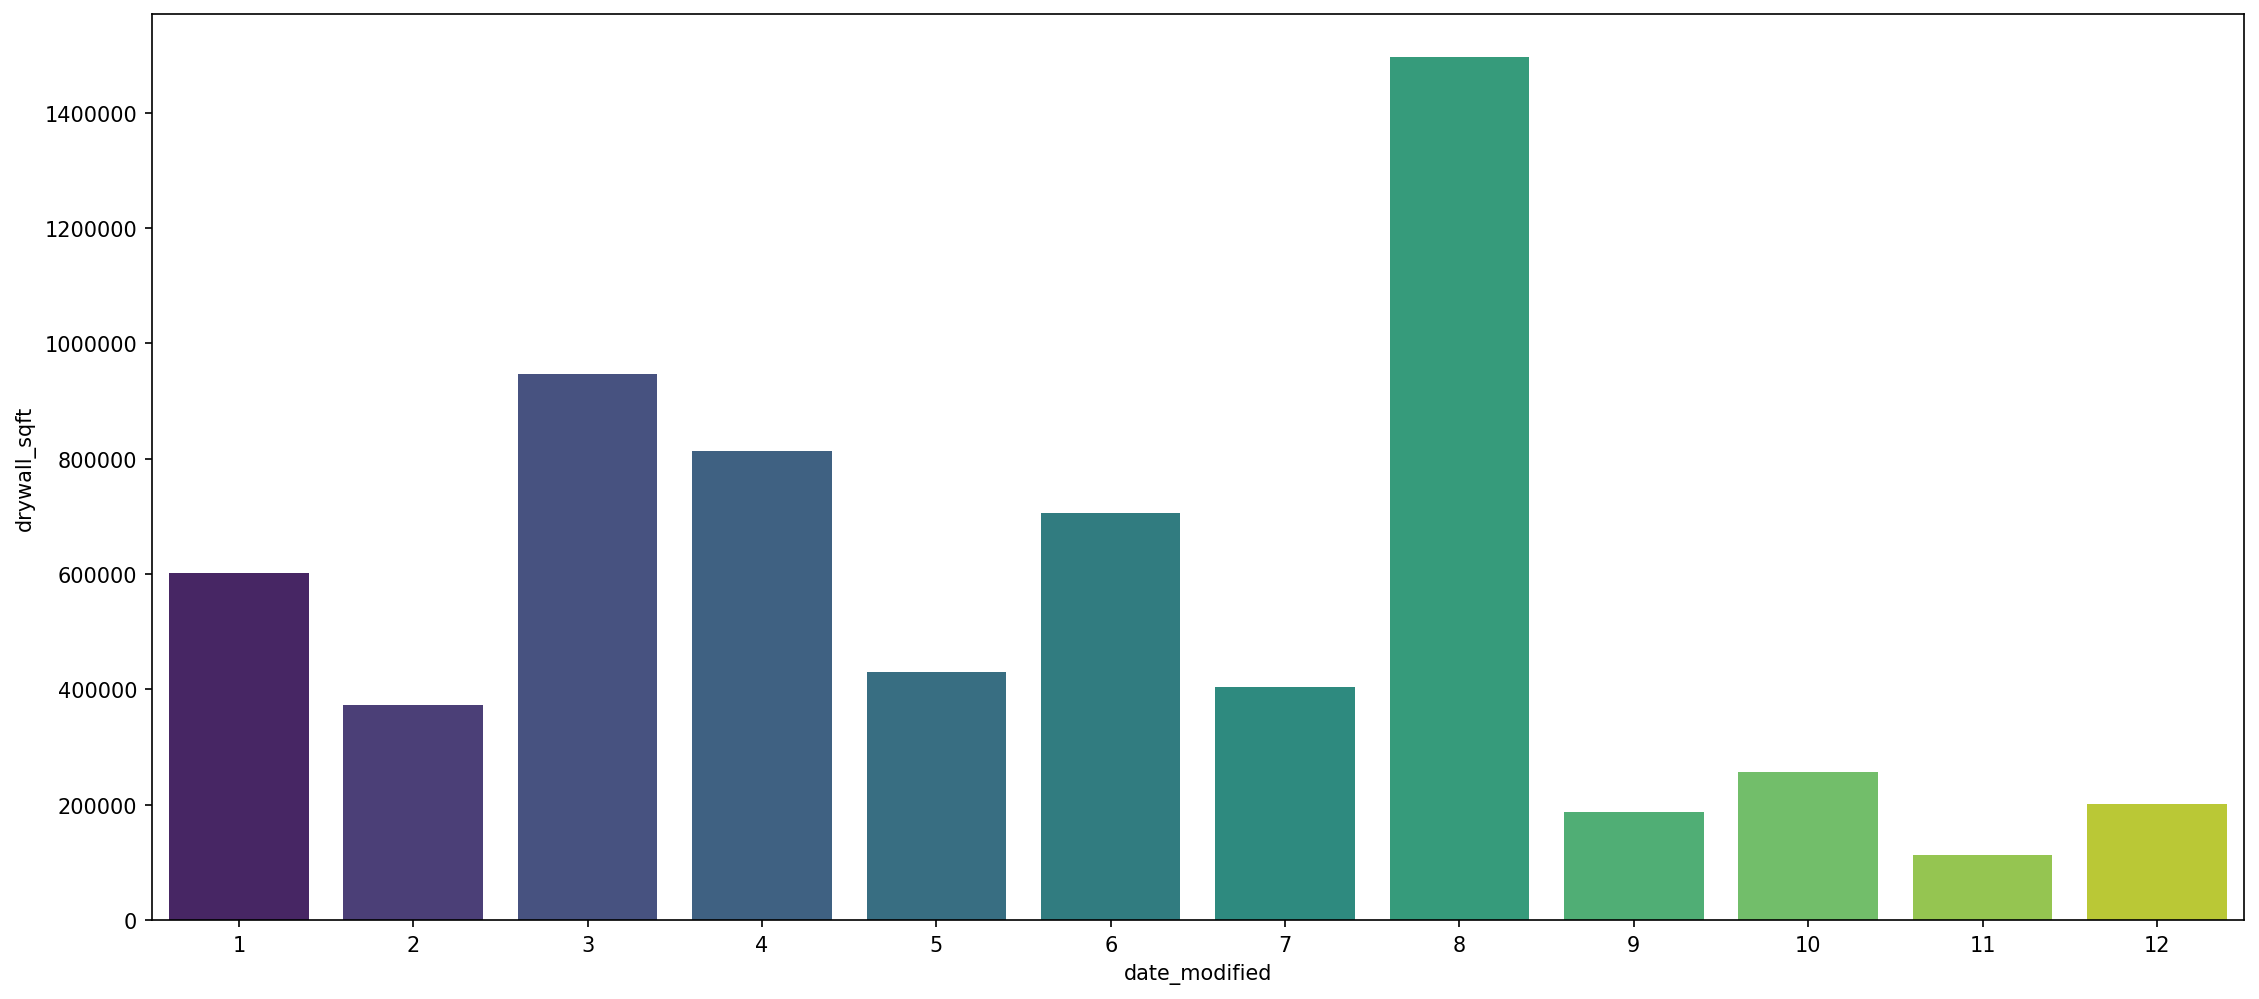

In [394]:
plt.figure(figsize = (18,8), dpi = 150)
plt.ticklabel_format(style = 'plain')
sns.barplot(data = group_df, x = group_df.index, y = 'drywall_sqft', palette = "viridis")

plt.show()
# sns.barplot(x =group_df['date_modified'], y = group_df['drywall_sqft'])

In [194]:
# for date in df['date_modified']:
#     x = str(date).split('-')[0:2]
#     x = x[1]+'/'+x[0]    
#     df['month_year'] = x
df['month_year'] = 0
def month_year():
    for i in range(0,len(df['date_modified'])):
        x = str(df['date_modified'][i]).split('-')[0:2]
        x = x[1]+'/'+x[0]
        df['month_year'][i] = x

month_year()
df['month_year'] = pd.to_datetime(df['month_year'])

    

<ipython-input-194-e8a062cff239>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year'][i] = x
C:\Users\blomb\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In the process of viewing and auditing the new column 'month_year' I noticed some major gaps in the dates. 'month_year' is a derivative of 'date_modified'. 'date_modified' is pulled from the excel file and refers to the last date any modifications were performed on the file. 

The intended output of 'month_year' is the creation date of the file. Additional work will need to be performed to extract the creation date for the files. While the month_year dates are perfectly reflective of the underlying data it is close enough to use for the analysis.

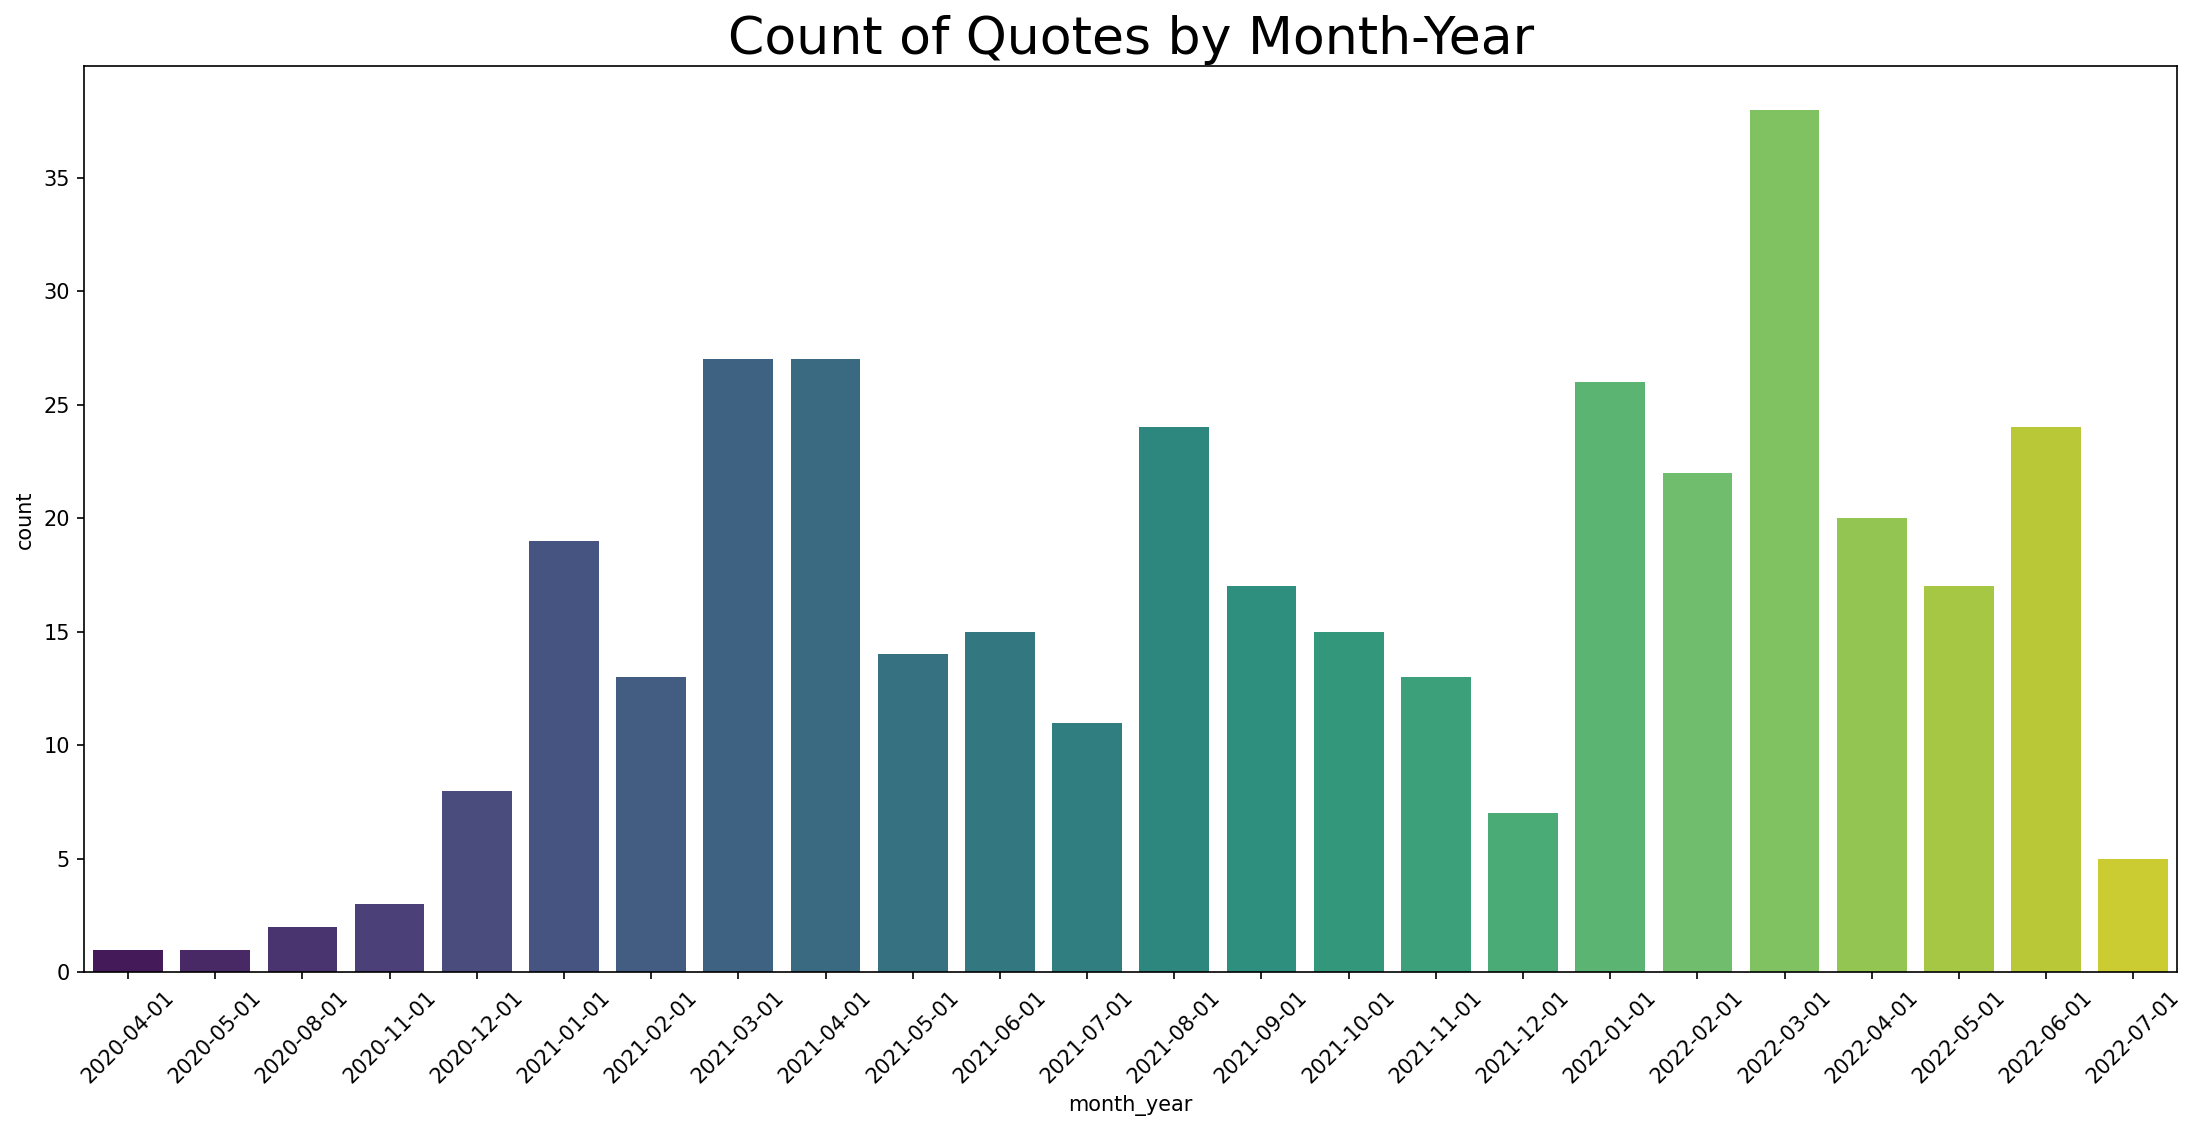

In [395]:
plt.figure(figsize = (18,8), dpi = 150)
plt.xticks(rotation = 45)
sns.countplot(data= df, x = df['month_year'].dt.date.sort_values(), palette = "viridis")
plt.title('Count of Quotes by Month-Year', size = 25)
plt.show()

#### Distribution of Quote Price by Month-Year and Year

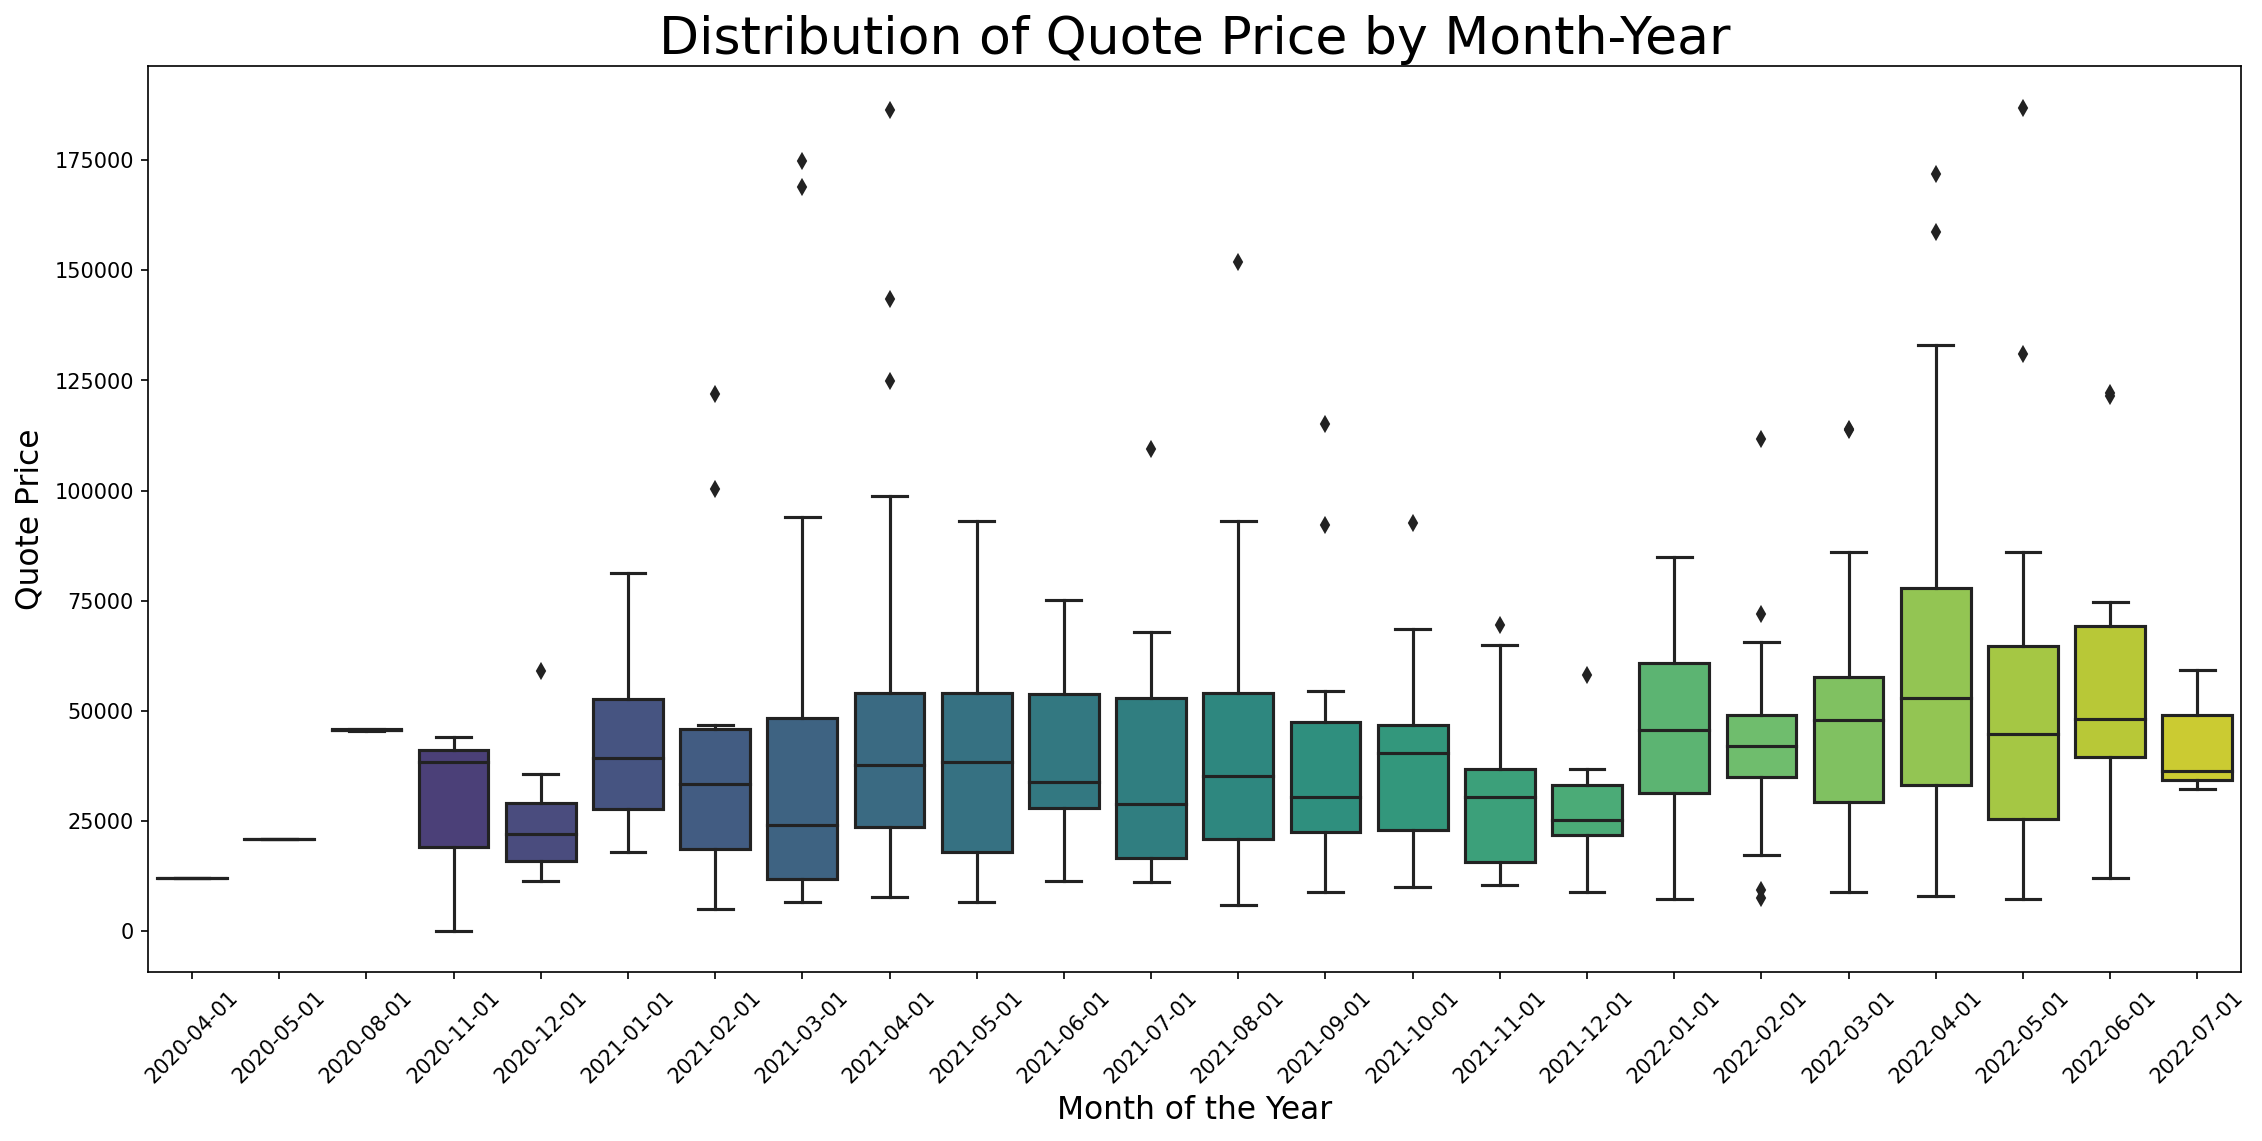

In [396]:

plt.figure(figsize = (18,8), dpi = 150)
plt.xticks(rotation = 45)
# plt.title('Distribution of Contract price', fontsize = 25)
# plt.xlabel('Month of the Year')
sns.boxplot(data = df, x = df['month_year'].dt.date.sort_values(), y = df[(df['total_price']<200000)]['total_price'],\
            palette = "viridis")
plt.title('Distribution of Quote Price by Month-Year', size = 25)
plt.xlabel('Month of the Year', size = 15)
plt.ylabel('Quote Price', size = 15)
plt.show()



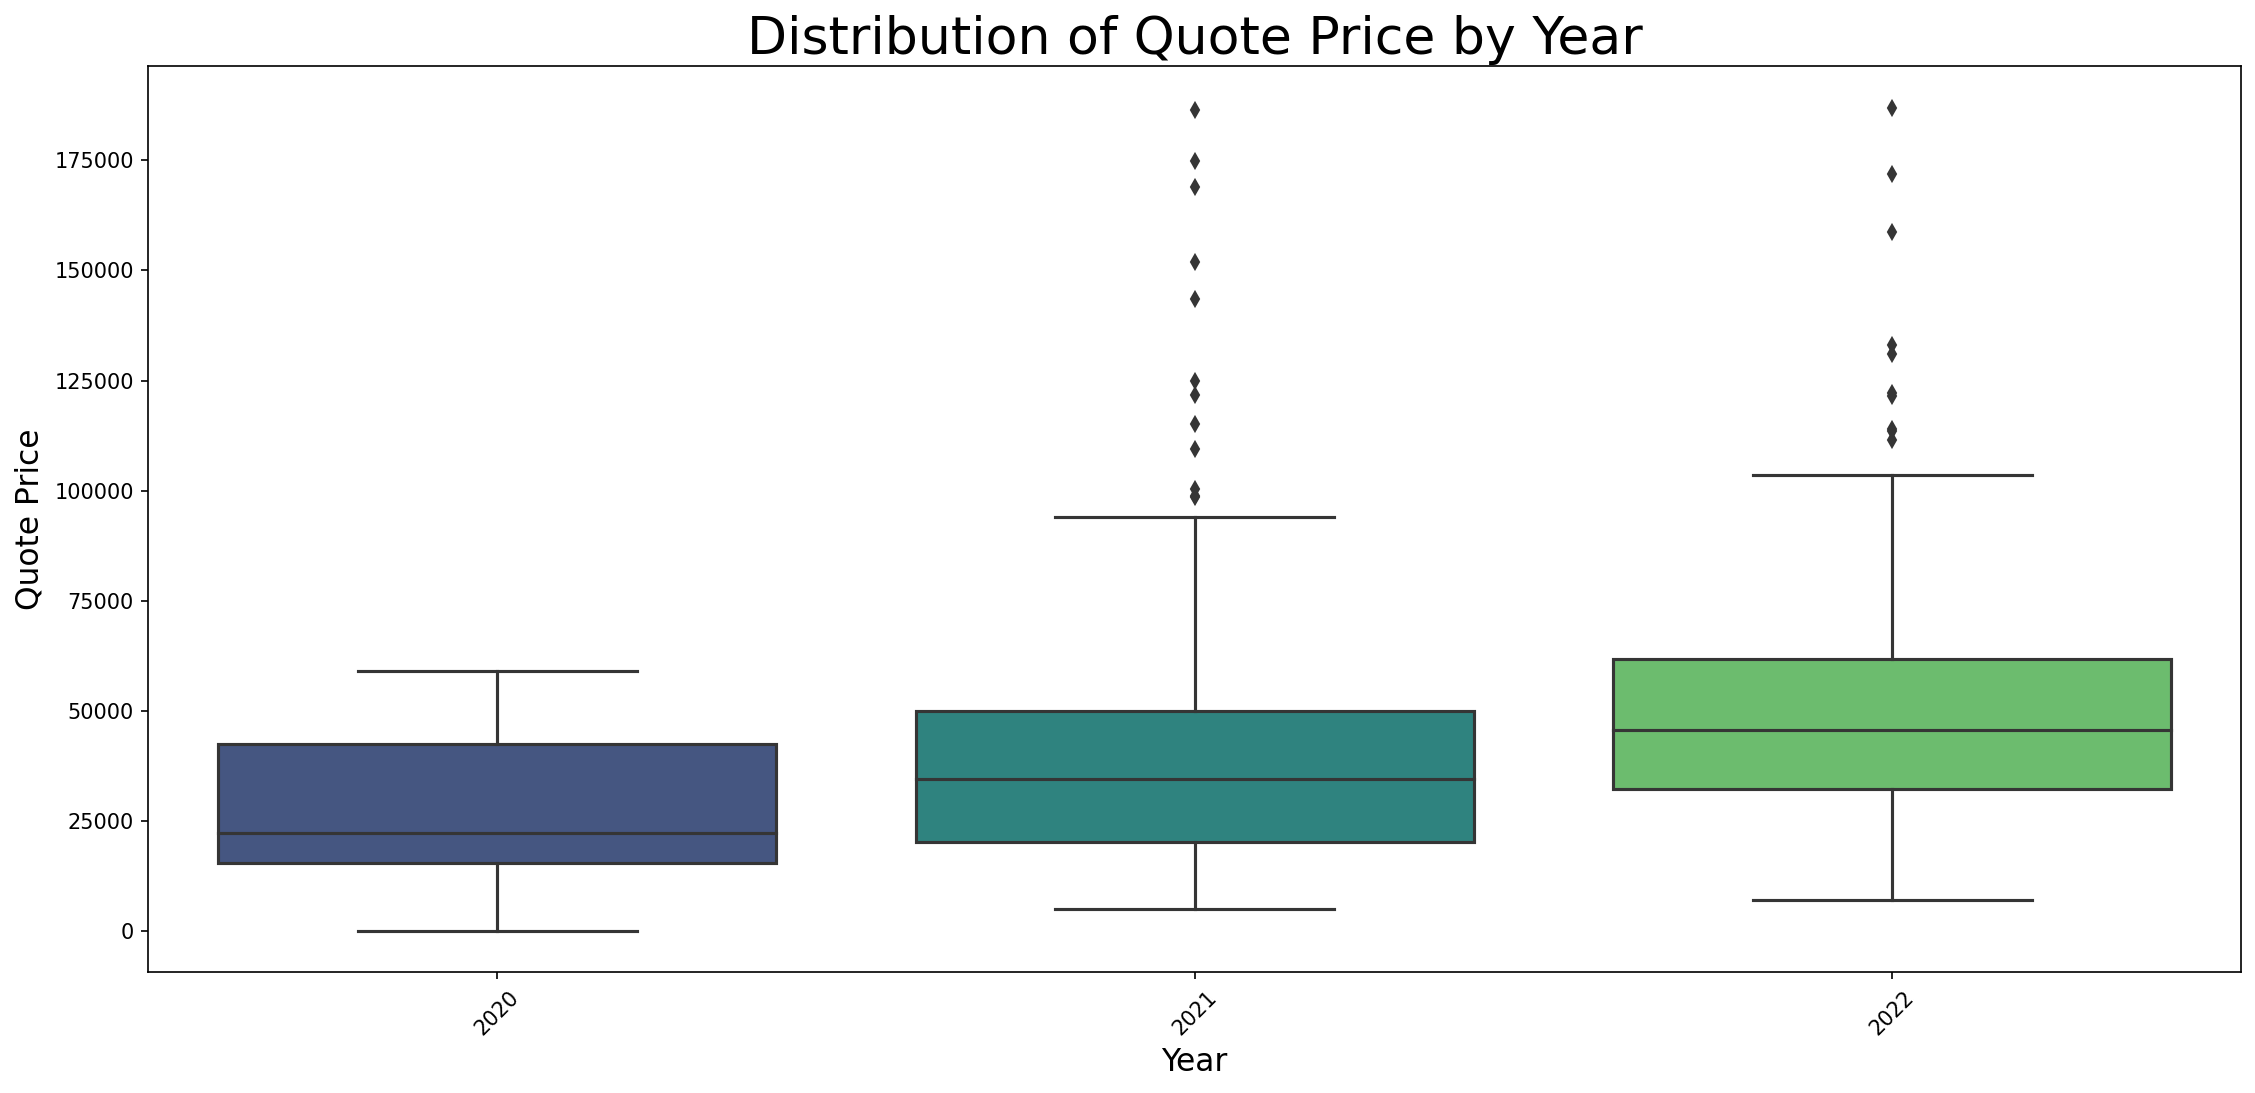

In [397]:
plt.figure(figsize = (18,8), dpi = 150)
plt.xticks(rotation = 45)
# plt.title('Distribution of Contract price', fontsize = 25)
# plt.xlabel('Month of the Year')
sns.boxplot(data = df, x = df['date_modified'].dt.year, y = df[(df['total_price']<200000)]['total_price'], palette = "viridis")
plt.title('Distribution of Quote Price by Year', size = 25)
plt.xlabel('Year', size = 15)
plt.ylabel('Quote Price', size = 15)
plt.show()

In [320]:
year_median = pd.DataFrame(df.groupby(df['date_modified'].dt.year)['total_price'].median()).reset_index()
year_median['percent_increase'] = abs(year_median['total_price'].shift(1)-year_median['total_price'])/\
(year_median['total_price'].shift(1))*100

In [323]:
year_median

,date_modified,total_price,percent_increase
0,2020,"22,597.03",NaN
1,2021,"35,796.94",58.41
2,2022,"45,655.25",27.54


<AxesSubplot:xlabel='date_modified', ylabel='count'>

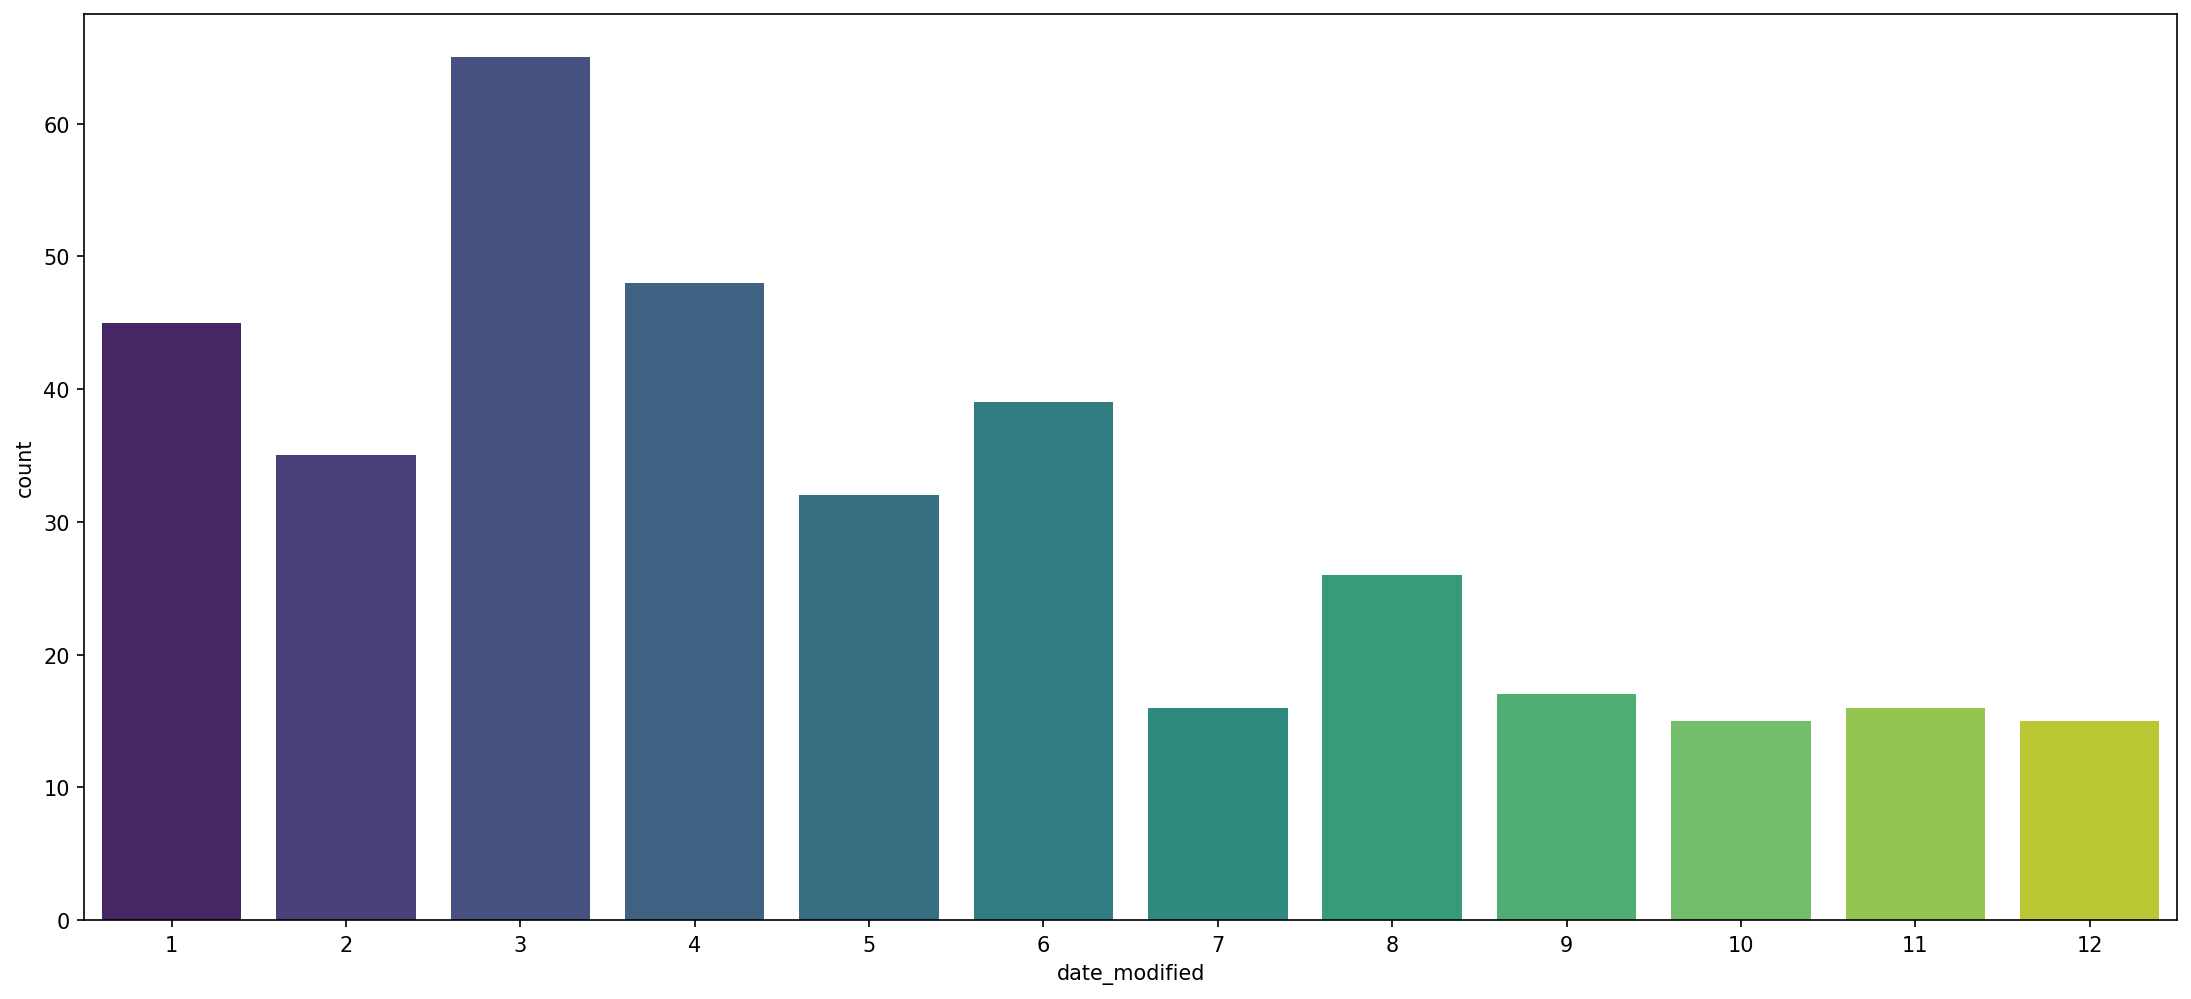

In [398]:
plt.figure(figsize = (18,8), dpi = 150)
sns.countplot(data=df, x = df['date_modified'].dt.month, palette = "viridis")